## Импорт

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv('heart_failure_clinical_records_dataset.csv')
import warnings
warnings.filterwarnings('ignore')

In [2]:
#красота - темный фон графиков для тёмной темы юпитера
from jupyterthemes import jtplot
jtplot.style('onedork')

## Разведочный анализ данных

### Общая информация, целевой признак.

In [3]:
data.sample(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
246,55.0,0,2017,0,25,0,314000.00,1.10,138,1,0,214,1
273,42.0,0,64,0,40,0,189000.00,0.70,140,1,0,245,0
195,77.0,1,418,0,45,0,223000.00,1.80,145,1,0,180,1
276,70.0,0,618,0,35,0,327000.00,1.10,142,0,0,245,0
132,46.0,0,719,0,40,1,263358.03,1.18,137,0,0,107,0
267,56.0,1,135,1,38,0,133000.00,1.70,140,1,0,244,0
49,57.0,1,129,0,30,0,395000.00,1.00,140,0,0,42,1
268,45.0,0,582,1,38,0,302000.00,0.90,140,0,0,244,0


In [4]:
data = data.rename(columns = {'DEATH_EVENT':'death_event'})

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  death_event               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


Признаки в основном целочисленные, три с плавающей запятой, но к ним надо присмотреться, потому что два из них можно попробовать перевести в целочисленные.

- `age` - возраст пациента (0-120, старше и младше не бывает)
- `anaemia` - снижение показателей красных кровяных телец или гемоглобина (бинарный)
- `creatinine_phosphokinase` - уровень фермента КФК в крови (мкг/л)
- `diabetes` - наличие диабета (бинарный)
- `ejection_fraction` - процент крови, покидающей сердце при каждом сокращении (в процентах, диапазон значений от 0 до 100)
- `high_blood_pressure` - наличие гипертонии (бинарный)
- `platelets` - тромбоциты в крови (1000/мл)
- `serum_creatinine` - уровень сывороточного креатинина в крови (мг/дл)
- `serum_sodium` - уровень сывороточного натрия в крови (мэкв/л)
- `sex` - женщина или мужчина (бинарный)
- `smoking` - курит пациент или нет (бинарный)
- `time` - период наблюдения (дни) 
- `DEATH_EVENT` - целевой признак, пациент умер в течение периода наблюдения (бинарный)

Все признаки должны быть неотрицательными.
Взглянем на них.

In [6]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


Да, все неотрицательные, в допустимых диапазонах (для тех значений, которые мы обозначили ранее).


In [7]:
data.duplicated().sum()

0

Дублей не наблюдается.
Построим матрицу корреляций.

<AxesSubplot:>

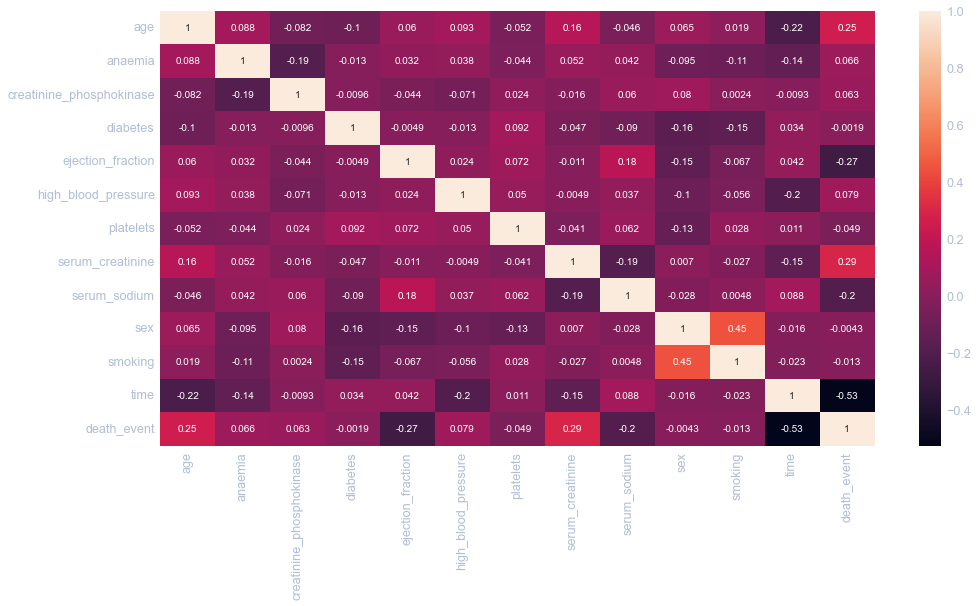

In [8]:
correlation_matrix = data.corr()

plt.figure(figsize= (16, 8))
sns.heatmap(correlation_matrix, annot = True)

Видим, что положительная корреляция есть между полом и курением, а также между временем наблюдения и целевым признаком. Также наблюдаем несколько ощутимую связь между целевым признаком и возрастом, уровнем креатинина и натрия (разнонаправленные) и размером выброса крови при сокращении сердца. 

Пропуски

In [9]:
data.isna().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
death_event                 0
dtype: int64

Пропусков нет.

Преобразуем тип данных столбца age.

In [10]:
data['age'] = data['age'].astype(int)

Для начала посмотрим как выглядит целевой признак, то есть оценим соотношение событий. 

<AxesSubplot:xlabel='death_event', ylabel='count'>

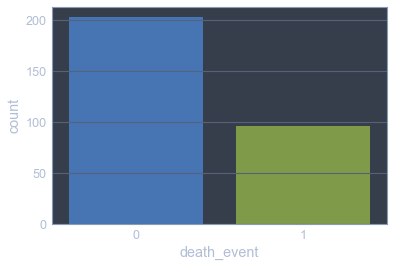

In [11]:
#sns.countplot('death_event', data=data)
sns.countplot(x=data['death_event'])

Зафиксированых случаев смерти почти в два раза меньше чем случев с положительным исходом, таким образом имеется явный дисбаланс классов. А значит и дальнейшая работа будет затруднена, например прогнозы будут более благоприятные, то есть смещаться в сторону отсутствия смерти от сердечной недостаточности.

Посмотрим как распределены сами признаки. Для удобства восприятия сначала отобразим распределение категориальных признаков, затем числовых.
К категориальным относятся: наличие анемии, диабета, высокого давления, а так же пол и факт курения.
К числовым все оставшиеся.

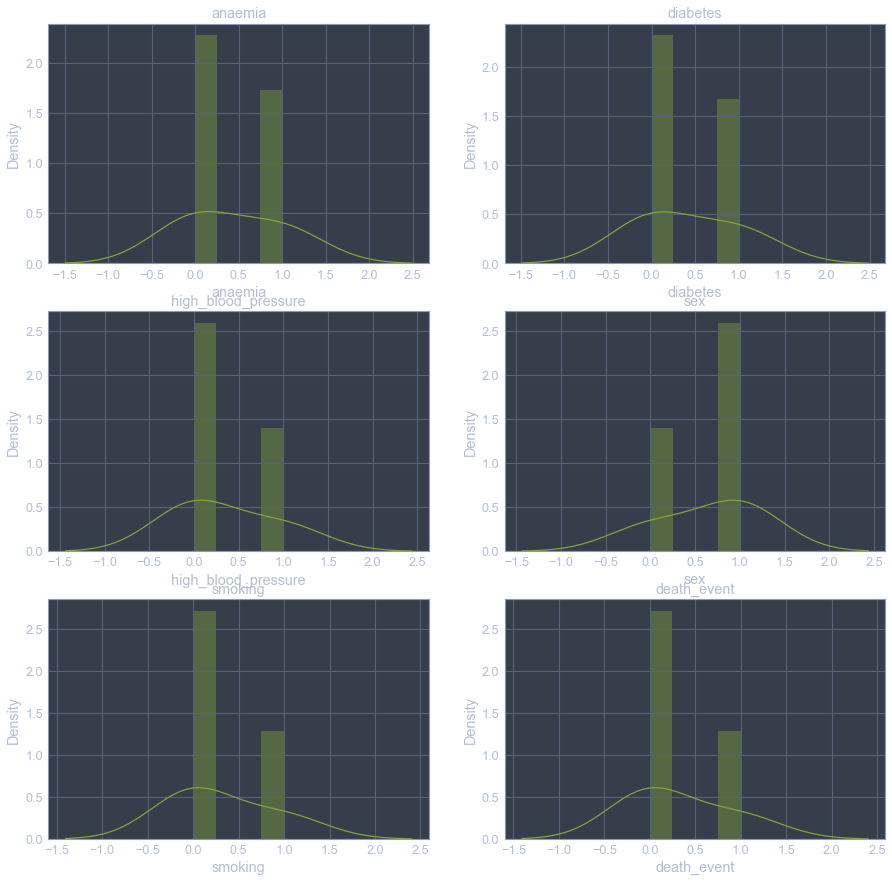

In [12]:
#категориальные признаки
list_of_categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'death_event']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (15,15))
for i in range(len(list_of_categorical_features)):
    plt.subplot(3,2,i+1)
    sns.distplot(data[list_of_categorical_features[i]],color = 'g', kde_kws = {'bw' : True});
    title = list_of_categorical_features[i]
    plt.title(title)

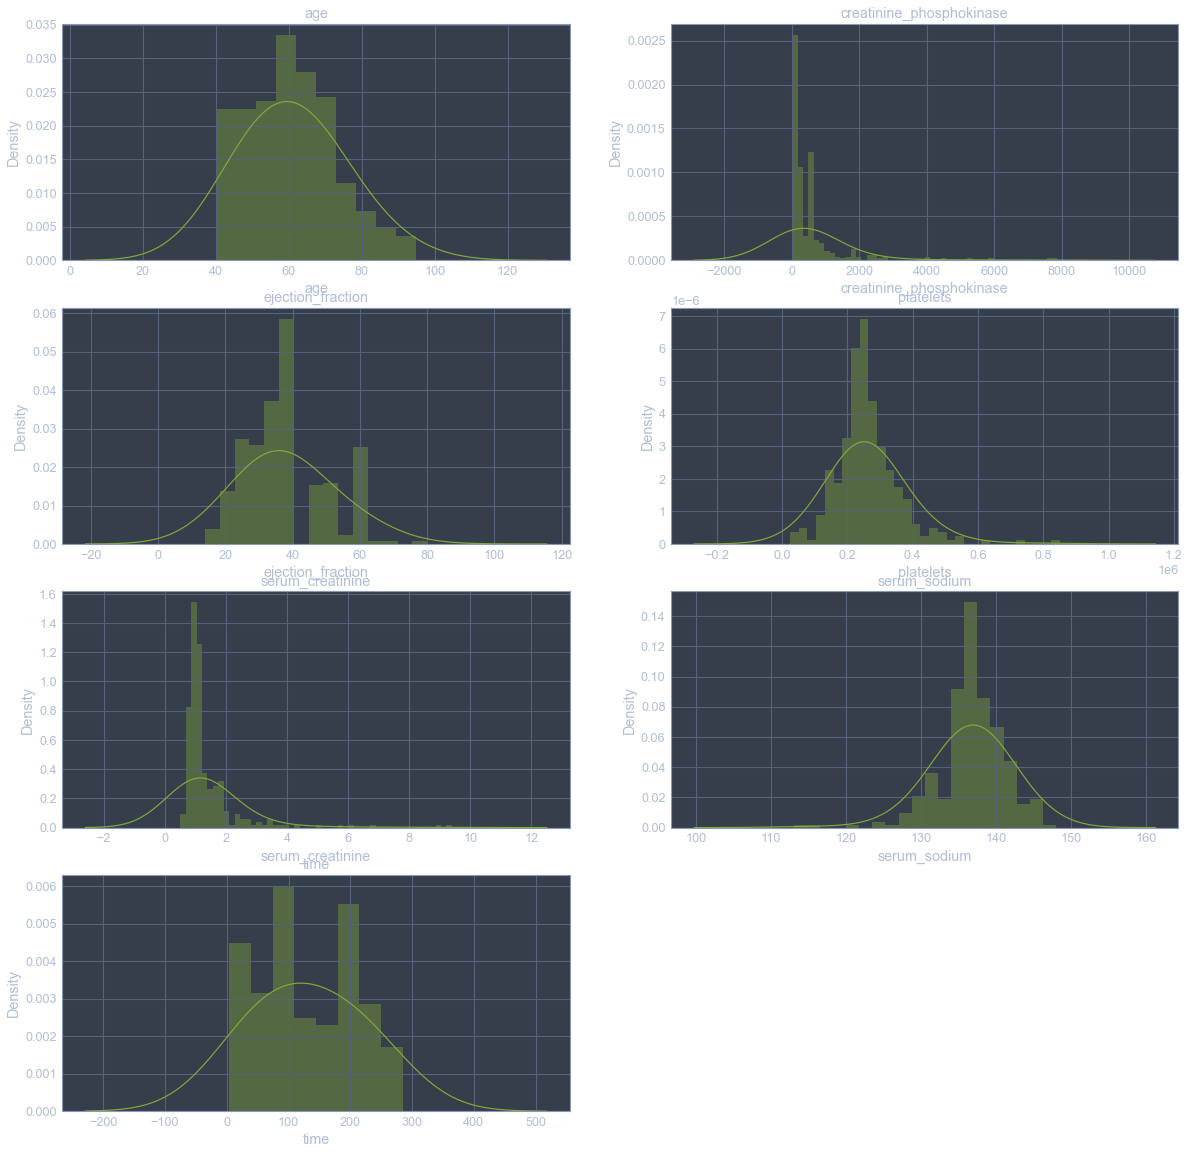

In [13]:
#числовые признаки
list_of_numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

fig, ax = plt.subplots(nrows = 3,ncols = 2,figsize = (20,20))
for i in range(len(list_of_numerical_features)):
    plt.subplot(4,2,i+1)
    sns.distplot(data[list_of_numerical_features[i]],color = 'g', kde_kws = {'bw' : True});
    title = list_of_numerical_features[i]
    plt.title(title)

Итак, почти все признаки распределены нормально, за исключением, например, времени или уровня сывороточного натрия/креатина.

Далее следует посмотреть на то как зависит, например, факт смерти от факта наличия анемии и тд... Для числовых признаков аналогично

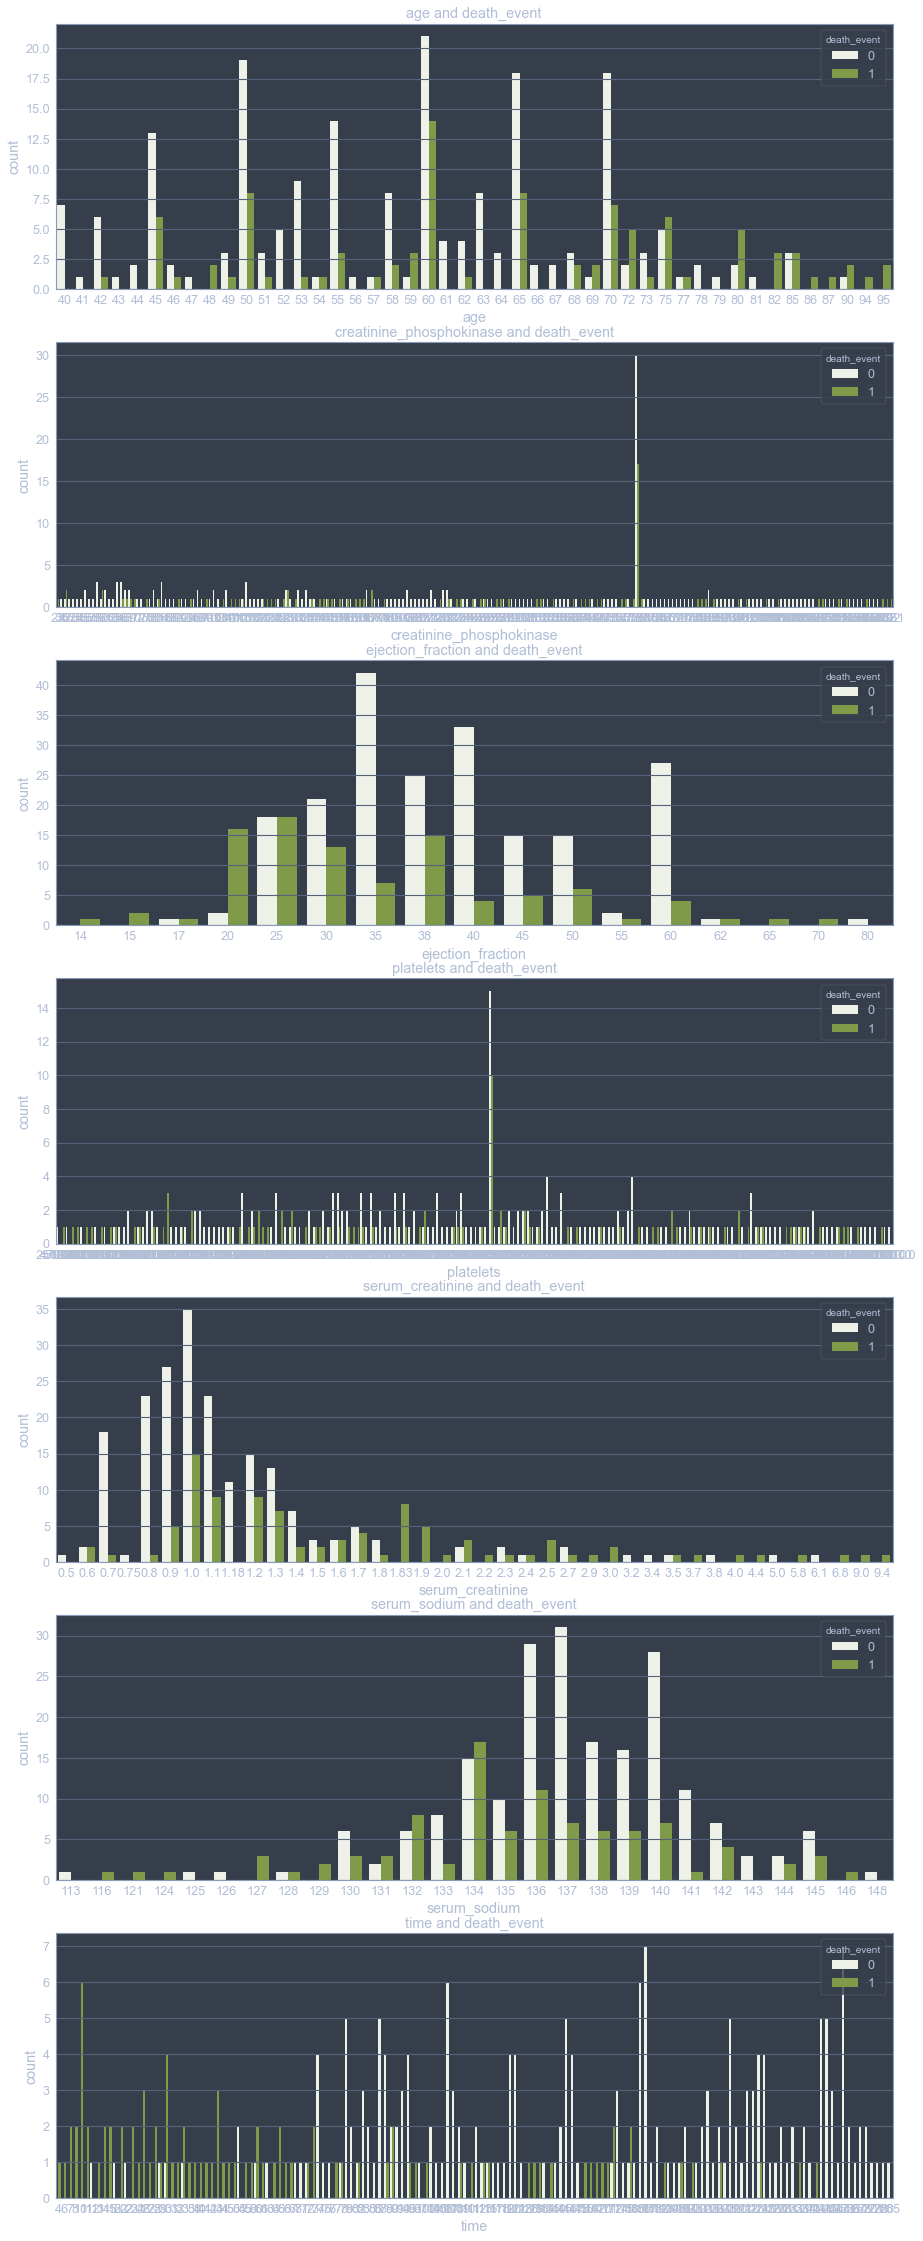

In [14]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,40))
for i in range(len(list_of_numerical_features)):
    plt.subplot(7,1,i+1)
    sns.countplot(x = data[list_of_numerical_features[i]],data=data, hue='death_event',color = 'g');
    title = list_of_numerical_features[i] + ' and death_event' 
    plt.title(title)

На графиках по оси х слишком много точек, поэтому их сложно итерпретировать, возможно,  в этих случаях более информативными будут другие виды графикв...

Но однозначно можно сказать, что мы наблюдаем увеличение смертности начиная с 42 лет. Пики смертности приходятся на вораст 45, 50,60 65, 70, 72 75 и 80 лет.
Повышается риск смертности при проценте крови, покидающей сердце при каждом сокращении, равном от 20 до 60. Пики приходятся на процент равный 20, 25, 30 и 38.
При уровене сывороточного креатинина в крови начиная с 0.6 до 3.0, мы видим рост смертности, ощутымый рост приходится на значения 0.9-1.1, 1.2 и 1.3, 1,83, 1.9.
Уровень сывороточного натрия начиная с 127 - 145 свидетельсьтвует о риске смертности.

#### Если попробовать посчитать процент смертнности для числовых признаков так? вместо того, что сверху. можно конечно поиграться с типами графиков....???

,number_of_death,number_of_observations,mortality_rate
age,,,
40,0,7,0.0
41,0,1,0.0
42,1,7,14.0
43,0,1,0.0
44,0,2,0.0
45,6,19,32.0
46,1,3,33.0
47,0,1,0.0
48,2,2,100.0


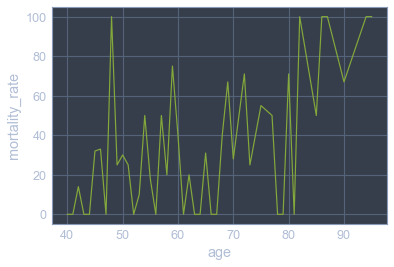

,number_of_death,number_of_observations,mortality_rate
creatinine_phosphokinase,,,
23,1,1,100.0
30,0,1,0.0
47,2,3,67.0
52,0,1,0.0
53,0,1,0.0
...,...,...,...
4540,0,1,0.0
5209,0,1,0.0
5882,1,1,100.0


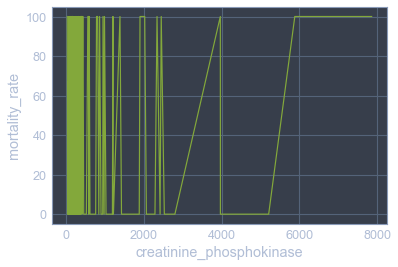

,number_of_death,number_of_observations,mortality_rate
ejection_fraction,,,
14,1,1,100.0
15,2,2,100.0
17,1,2,50.0
20,16,18,89.0
25,18,36,50.0
30,13,34,38.0
35,7,49,14.0
38,15,40,38.0
40,4,37,11.0


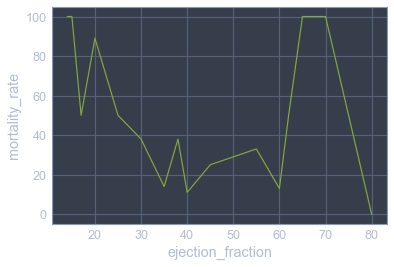

,number_of_death,number_of_observations,mortality_rate
platelets,,,
25100.0,0,1,0.0
47000.0,1,1,100.0
51000.0,0,1,0.0
62000.0,1,1,100.0
70000.0,1,1,100.0
...,...,...,...
533000.0,0,1,0.0
543000.0,0,1,0.0
621000.0,1,1,100.0


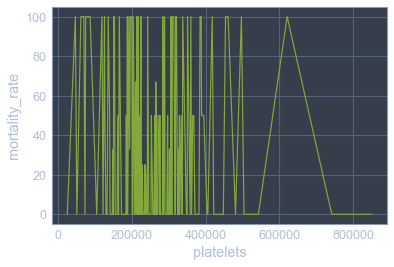

,number_of_death,number_of_observations,mortality_rate
serum_creatinine,,,
0.50,0,1,0.0
0.60,2,4,50.0
0.70,1,19,5.0
0.75,0,1,0.0
0.80,1,24,4.0
0.90,5,32,16.0
1.00,15,50,30.0
1.10,9,32,28.0
1.18,0,11,0.0


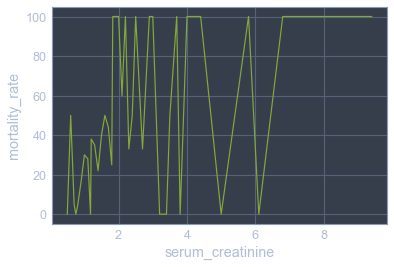

,number_of_death,number_of_observations,mortality_rate
serum_sodium,,,
113,0,1,0.0
116,1,1,100.0
121,1,1,100.0
124,1,1,100.0
125,0,1,0.0
126,0,1,0.0
127,3,3,100.0
128,1,2,50.0
129,2,2,100.0


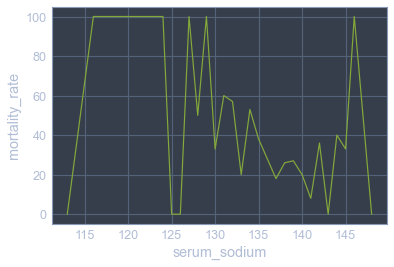

,number_of_death,number_of_observations,mortality_rate
time,,,
4,1,1,100.0
6,1,1,100.0
7,2,2,100.0
8,2,2,100.0
10,6,6,100.0
...,...,...,...
270,0,2,0.0
271,0,1,0.0
278,0,1,0.0


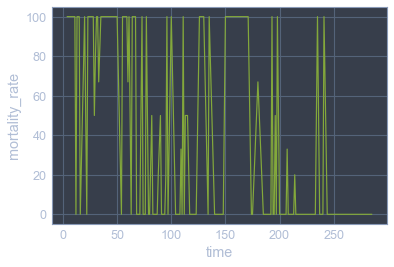

In [15]:
for i in range(len(list_of_numerical_features)):
    table = data.pivot_table(index=list_of_numerical_features[i], values='death_event', aggfunc=['sum','count'])
    table.columns = ['number_of_death','number_of_observations']
    table['mortality_rate'] = round(table['number_of_death']*100/table['number_of_observations'],0)
    display(table)
    #sns.countplot(x = data[list_of_categorical_features[i]],data=data, hue='death_event',color = 'g');
    #title = list_of_categorical_features[i] + ' and death_event' 
    #plt.title(title)
    #plt.show()
    sns.lineplot(data=table, x=list_of_numerical_features[i], y='mortality_rate', color = 'g')
    plt.show()
    
    

Итак, у нас есть 5 категориальных бинарных признаков, таким образом, мы можем рассматривать пациентов сгрупированных по данным признакам, а группы разделить на подгруппы и расчитать процент смертности для каждой из них. На примере анемии: рассмотрим пациентов относительно данного признака, разделим их на две подгруппы, первая из которых - это все те пациенты, у кого была зафиксирована анемия, вторая, наоборот. В каждой из подгруп посчитаем процент смертности, оформим расчеты в сводную таблицу для удобства.

,number_of_death,number_of_observations,mortality_rate
anaemia,,,
0,50,170,0.294118
1,46,129,0.356589


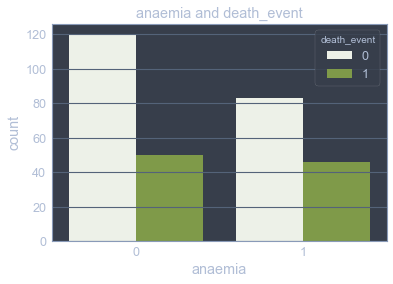

,number_of_death,number_of_observations,mortality_rate
diabetes,,,
0,56,174,0.321839
1,40,125,0.320000


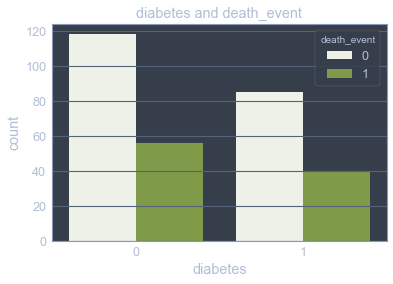

,number_of_death,number_of_observations,mortality_rate
high_blood_pressure,,,
0,57,194,0.293814
1,39,105,0.371429


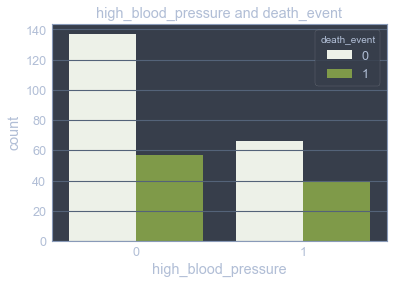

,number_of_death,number_of_observations,mortality_rate
sex,,,
0,34,105,0.323810
1,62,194,0.319588


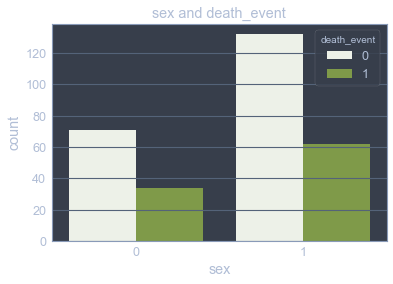

,number_of_death,number_of_observations,mortality_rate
smoking,,,
0,66,203,0.325123
1,30,96,0.312500


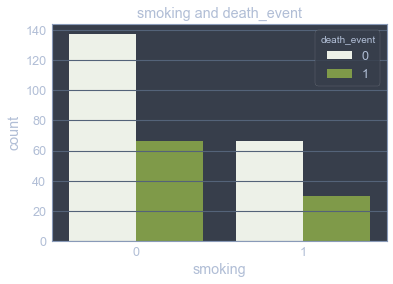

In [16]:
for i in range(len(list_of_categorical_features)-1):
    table = data.pivot_table(index=list_of_categorical_features[i], values='death_event', aggfunc=['sum','count'])
    table.columns = ['number_of_death','number_of_observations']
    table['mortality_rate'] = table['number_of_death']/table['number_of_observations']
    display(table)
    sns.countplot(x = data[list_of_categorical_features[i]],data=data, hue='death_event',color = 'g');
    title = list_of_categorical_features[i] + ' and death_event' 
    plt.title(title)
    plt.show()

1) Согласно графикам и расчетам в таблицах можно отметить следующее: риски смертности увеличивается при наличии анемии и высокого давления, диабет курение и пол не повышают риски;

2) Но, очень важно отметить, что имеется явный перекос в данных, на последнем примере это очень хорошо видно, подгруппа курящих пациентов более чем в два раза меньше подгруппы некурящих, это затрудняет сделать правильный вывод относительно смертности по данному признаку. Это распространяется и на другие группы;

3) Поэтому мы не можем с уверенностью считать, что наши выводы по пункту 1 корректны.

##### Категоризация времени, разбиение на недели.

In [17]:
data['time_week'] = (data['time']-1)//7
data.sample(8)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,death_event,time_week
184,58,1,145,0,25,0,219000.0,1.2,137,1,1,170,1,24
47,60,0,582,1,38,1,451000.0,0.6,138,1,1,40,1,5
144,72,1,943,0,25,1,338000.0,1.7,139,1,1,111,1,15
160,66,1,72,0,40,1,242000.0,1.2,134,1,0,121,0,17
166,53,0,196,0,60,0,220000.0,0.7,133,1,1,134,0,19
108,63,0,936,0,38,0,304000.0,1.1,133,1,1,88,0,12
282,42,0,64,0,30,0,215000.0,3.8,128,1,1,250,0,35
186,50,0,582,0,50,0,153000.0,0.6,134,0,0,172,1,24


In [18]:
df_time = pd.DataFrame()

df_time['death'] = data.groupby('time_week')['death_event'].sum()
df_time['count'] = data.groupby('time_week')['death_event'].count()
df_time['percent_of_death'] = round(df_time['death']*100/df_time['count'], 0)

df_time.sort_values(by='percent_of_death', ascending=False)

,death,count,percent_of_death
time_week,,,
0,4,4,100.0
18,2,2,100.0
5,4,4,100.0
6,5,5,100.0
23,1,1,100.0
1,13,14,93.0
3,9,10,90.0
9,5,6,83.0
2,4,5,80.0


<AxesSubplot:xlabel='time_week', ylabel='percent_of_death'>

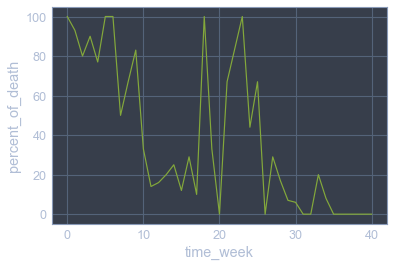

In [19]:
sns.lineplot(data=df_time, x="time_week", y="percent_of_death", color = 'g')

Вот так мы видим, что смертность выше 50% на промежутке наблюдения до 10 недель, между 21 и 24 неделями и на 18-й неделе.

Построим диаграмму размаха.

In [20]:
list_of_numerical_features = list_of_numerical_features + ['time_week']
list_of_numerical_features.remove('time')

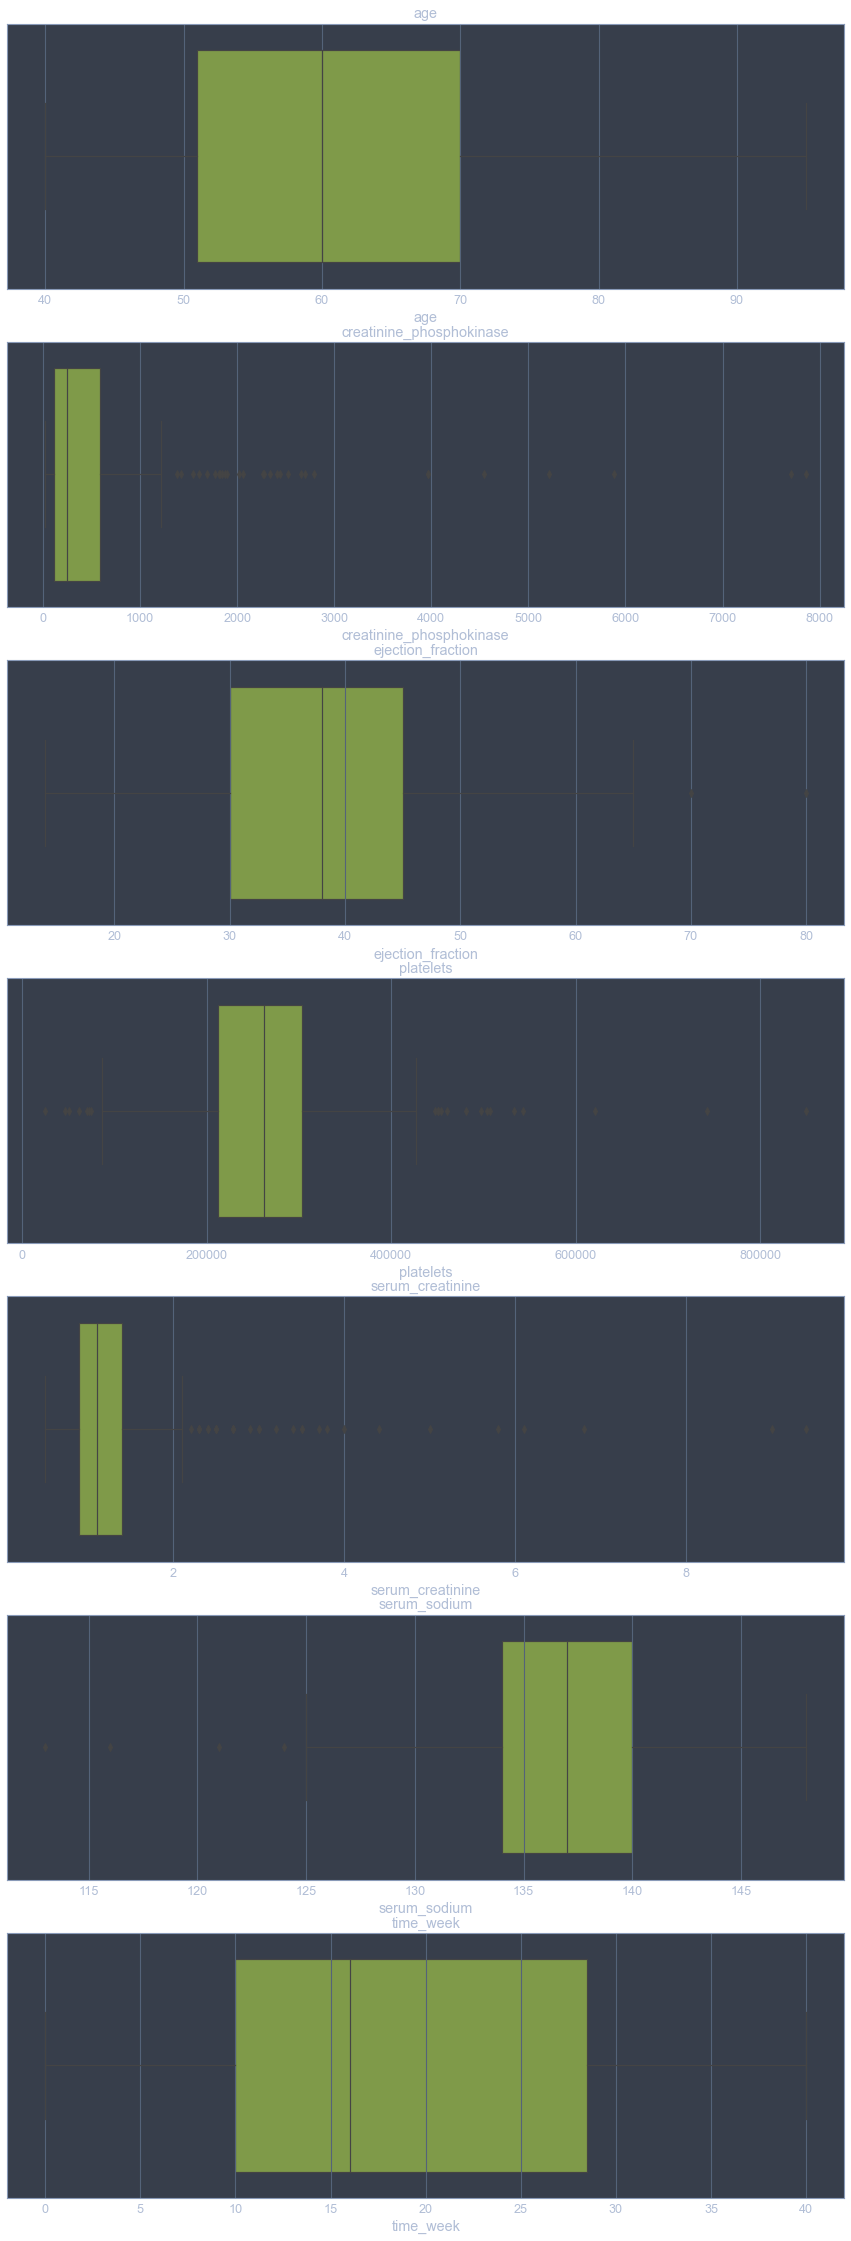

In [21]:
fig, ax = plt.subplots(nrows = 7,ncols = 1,figsize = (15,40))
for i in range(len(list_of_numerical_features)):
    plt.subplot(7,1,i+1)
    sns.boxplot(x=data[list_of_numerical_features[i]], color='g');
    title = list_of_numerical_features[i] 
    plt.title(title)

#### А стоит ли избавляться от выбросов?

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,death_event,time_week
0,75,582,20,265000.00,1.9,130,1,0
1,55,7861,38,263358.03,1.1,136,1,0
2,65,146,20,162000.00,1.3,129,1,0
3,50,111,20,210000.00,1.9,137,1,0
4,65,160,20,327000.00,2.7,116,1,1
...,...,...,...,...,...,...,...,...
294,62,61,38,155000.00,1.1,143,0,38
295,55,1820,38,270000.00,1.2,139,0,38
296,45,2060,60,742000.00,0.8,138,0,39
297,45,2413,38,140000.00,1.4,140,0,39


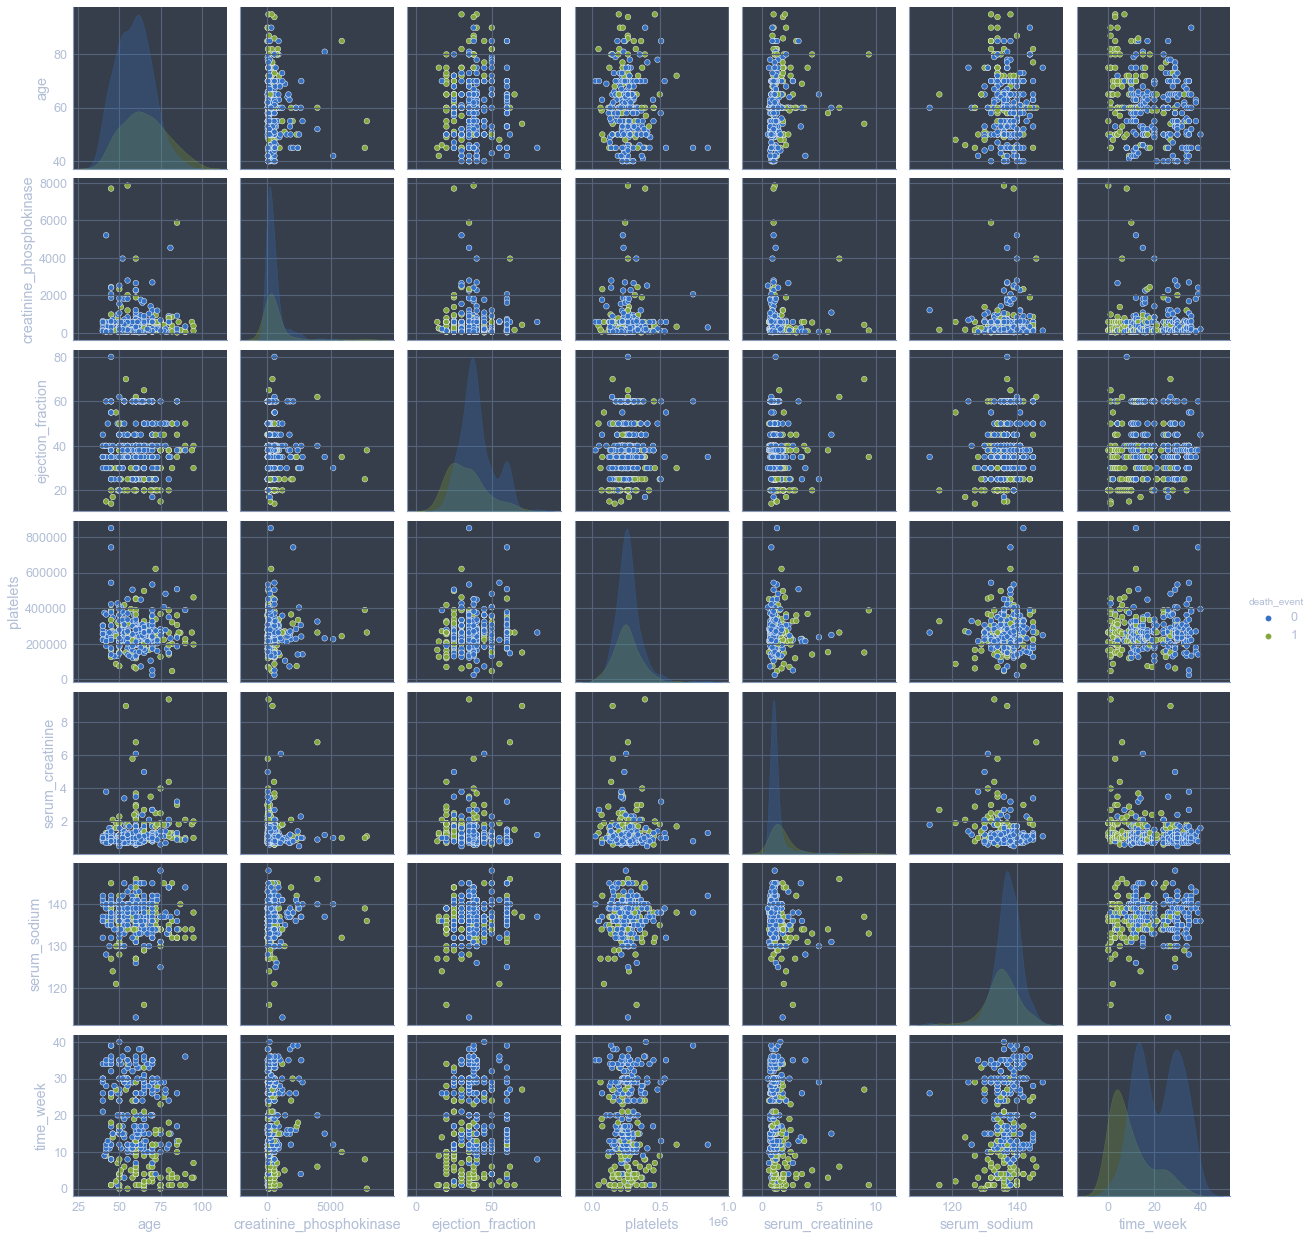

In [22]:
list_drop = list_of_categorical_features + ['time'] 
list_drop.remove('death_event')
data_numerical = data.drop(list_drop, axis=1)
display(data_numerical)
sns.pairplot(data_numerical, hue='death_event')

Видим, что данные кучкуются в некоторых параметрах (хорошо видно на времени наблюдения, как на первых неделях высока смертность, на объёме сердцебиения можно заметить). По диагональным распределениям можно сказать, что чем сильнее различаются кривые, тем заметней влияние величин друг на друга. Скорее всего, влияние параметра, связанного с тромбоцитами, будет несущественное, его можно исключить из параметров для обучения модели предсказания. Оранжевая кривая полностью скрывается под синей, симметрично и с максимумом на одной оси (визуально).

In [23]:
len(data) # зафиксировать размер, чтоб понять, сколько строк ушло.

299

In [24]:
def del_quantile(df, param_name):
    q1 = df[param_name].quantile(.25)
    q3 = df[param_name].quantile(.75)

    q0 = q1 - (q3-q1)*1.5
    q4 = q3 + (q3-q1)*1.5

    df = df.loc[(df[param_name]>q0) & (df[param_name]<q4)]

In [25]:
for item in list_of_numerical_features:
    del_quantile(data, item)

In [26]:
len(data)

299

Вышло так, что даже выбросы попадают внуть диапазона 3 сигма, и ни одна строка не потеряна.